# Control the density profiles stabilisation atempt using GSW package of the original WOA09 dataset 

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import gsw as gsw
from netCDF4 import Dataset


from matplotlib import rcParams
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
! date

Thu Apr 10 15:05:45 CEST 2025


In [3]:
def Arc_Bat(ztype='isol1000') :
        locpath='/data0/project/drakkar/CONFIGS/CREG025.L75/GRID/'
        locfile='CREG025.L75_domain_cfg.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['bathy_meter'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='black', alpha=1.)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [4]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=0
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,3,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return m

> # Read input fields WOA2009 CT/SA profiles after stabilisation

In [6]:
# To get 2D lat/lon as depth as well 
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_latlonZ=xr.open_dataset(INDIR+'woa09_depth_Ex_L75.nc')
ds_latlonZ=ds_latlonZ.rename({'lat0':'lat','lon0':'lon'})
ds_latlonZ

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat: 180, lon: 360)
Dimensions without coordinates: time_counter, z, lat, lon
Data variables:
    depth    (time_counter, z, lat, lon) float32 ...
    lat      (lat, lon) float32 ...
    lon      (lat, lon) float32 ...

In [8]:
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_inT=xr.open_mfdataset(INDIR+'woa09_ConTem_monthly_1deg_CT_CMA_drowned_Ex_L75_TS_Stabilise.nc',decode_times=False)
ds_inT
ds_inS=xr.open_mfdataset(INDIR+'woa09_SalAbs_monthly_1deg_SA_CMA_drowned_Ex_L75_TS_Stabilise.nc',decode_times=False)
ds_inS

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat0: 180, lon0: 360)
Dimensions without coordinates: time_counter, z, lat0, lon0
Data variables:
    SA       (time_counter, z, lat0, lon0) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>

In [10]:
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_orT=xr.open_mfdataset(INDIR+'woa09_ConTem_monthly_1deg_CT_CMA_drowned_Ex_L75.nc',decode_times=False)
ds_orT
ds_orS=xr.open_mfdataset(INDIR+'woa09_SalAbs_monthly_1deg_SA_CMA_drowned_Ex_L75.nc',decode_times=False)
ds_orS

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat0: 180, lon0: 360)
Dimensions without coordinates: time_counter, z, lat0, lon0
Data variables:
    SA       (time_counter, z, lat0, lon0) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    lat      (lat0, lon0) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    lon      (lat0, lon0) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>

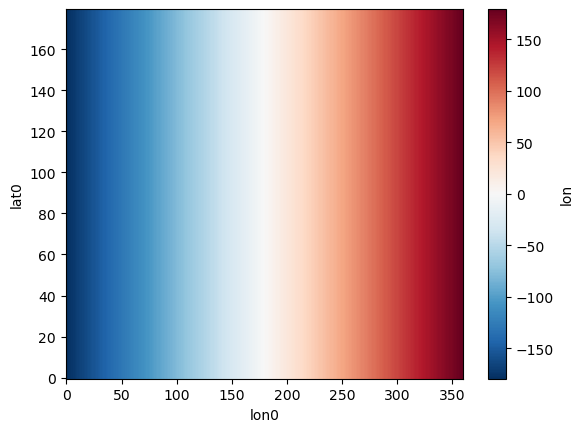

In [12]:
ds_orS.lon.plot()

In [13]:
# Add the geographical coordinates
ds_IN=xr.Dataset()
ds_IN['SA']=(('time_counter','depth','lat','lon'),ds_inS['SA'].data)
ds_IN['CT']=(('time_counter','depth','lat','lon'),ds_inT['CT'].data)
ds_IN.coords['lat']=(('lat'),ds_orS['lat'].isel(lon0=0).data)
ds_IN.coords['lon']=(('lon'),ds_orS['lon'].isel(lat0=0).data)
ds_IN.coords['depth']=(('depth'),ds_latlonZ['depth'].isel(time_counter=0,lat=0,lon=0).data)
ds_IN

<xarray.Dataset>
Dimensions:  (time_counter: 12, depth: 75, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
Dimensions without coordinates: time_counter
Data variables:
    SA       (time_counter, depth, lat, lon) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    CT       (time_counter, depth, lat, lon) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>

In [14]:
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_Tpot=xr.open_mfdataset(INDIR+'woa09_temperature_monthly_1deg_t_an_CMA_drowned_Ex_L75.nc',decode_times=False)
ds_Tpot
ds_PSU=xr.open_mfdataset(INDIR+'woa09_salinity_monthly_1deg_s_an_CMA_drowned_Ex_L75.nc',decode_times=False)
ds_PSU

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat0: 180, lon0: 360)
Dimensions without coordinates: time_counter, z, lat0, lon0
Data variables:
    s_an     (time_counter, z, lat0, lon0) float32 dask.array<chunksize=(1, 38, 90, 180), meta=np.ndarray>
Attributes:
    description:  WOA09 field for the 1degx1deg grid with duplicated levelswi...

In [223]:
ds_woa09_ori=xr.Dataset()
ds_woa09_ori['SA']=(('time_counter','z','lat','lon'),ds_orS['SA'].data)
ds_woa09_ori['CT']=(('time_counter','z','lat','lon'),ds_orT['CT'].data)
ds_woa09_ori['s_an']=(('time_counter','z','lat','lon'),ds_PSU['s_an'].data)
ds_woa09_ori['t_an']=(('time_counter','z','lat','lon'),ds_Tpot['t_an'].data)
ds_woa09_ori.coords['lat']=(('lat'),ds_orS['lat'].isel(lon0=0).data)
ds_woa09_ori.coords['lon']=(('lon'),ds_orS['lon'].isel(lat0=0).data)
ds_woa09_ori.coords['depth']=(('z'),ds_latlonZ['depth'].isel(time_counter=0,lat=0,lon=0).data)
ds_woa09_ori

<xarray.Dataset>
Dimensions:  (time_counter: 12, z: 75, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    depth    (z) float32 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
Dimensions without coordinates: time_counter, z
Data variables:
    SA       (time_counter, z, lat, lon) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    CT       (time_counter, z, lat, lon) float64 dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    s_an     (time_counter, z, lat, lon) float32 dask.array<chunksize=(1, 38, 90, 180), meta=np.ndarray>
    t_an     (time_counter, z, lat, lon) float32 dask.array<chunksize=(1, 38, 90, 180), meta=np.ndarray>

# Build a 3D lat and depth field to be used for the pressure calculation 

In [110]:
zzlat3D=np.reshape(ds_IN['lat'].data,(ds_IN.sizes['lat'],1))
zlat3D=np.tile(zzlat3D,(1,ds_IN.sizes['lon']))
lat3D=np.tile(zlat3D,(75,1,1))
zplt=np.reshape(ds_IN['depth'].data,(75,1,1))
zplt.shape
# Duplicate this depth to fit the T/S on a global grid
z3D=np.tile(zplt,(1,ds_IN.sizes['lat'],ds_IN.sizes['lon']))
lat3D.shape

(75, 180, 360)

# Read original WOA09 1degx1deg 24 levels [0-1500m] data to get a lan/sea mask

In [161]:
INDIR='/data0/project/drakkar/REFERENCE_DATA/WOA2009/DATA/1degx1deg/'
ds_initT=xr.open_mfdataset(INDIR+'woa09_temperature_monthly_1deg.nc',\
                          drop_variables=['t_mn','t_dd','t_dd','t_ma','t_sd','t_se','t_oa','t_gp'],\
                          decode_times=False)

# Shfit longitudes from 0,360 to -180/+180 as variables 
ds_initT = ds_initT.assign_coords(lon=(((ds_initT.lon + 180) % 360) - 180))
ds_initT = ds_initT.sortby('lon')
ds_initT

<xarray.Dataset>
Dimensions:           (lat: 180, depth: 24, time: 12, nv: 2, lon: 360)
Coordinates:
  * lat               (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * depth             (depth) float32 0.0 10.0 20.0 ... 1.3e+03 1.4e+03 1.5e+03
  * time              (time) float32 15.0 46.0 75.0 106.0 ... 289.0 320.0 350.0
  * lon               (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (lat, nv) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds          (lon, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    climatology_bnds  (time, nv) float32 dask.array<chunksize=(12, 2), meta=np.ndarray>
    t_an              (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    crs               int32 ...
Attributes: (12/40)
    CVS_ID:                     1.0
    Conventions:                CF-1.4
    id:                         75d70376-540c-4a1f-a0ca-f19f07dd7272
    naming_authority:           gov.noaa.nodc
    Metadata_Convention:        Unidata Dataset Discovery v1.0
    title:                      World Ocean Atlas 09:  Sea Water Temperature ...
    ...                         ...
    time_coverage_end:          2008-12-25
    time_coverage_duration:     P1Y
    time_coverage_resolution:   P1M
    processing_level:           synthesized product
    license:                    This data is free for anyone to use, reuse an...
    cdm_data_type:              Grid

In [158]:
INDIR='/data0/project/drakkar/REFERENCE_DATA/WOA2009/DATA/1degx1deg/'
ds_initS=xr.open_mfdataset(INDIR+'woa09_salinity_monthly_1deg.nc',\
                          drop_variables=['s_mn','s_dd','s_dd','s_ma','s_sd','s_se','s_oa','s_gp'],\
                          decode_times=False)

# Shfit longitudes from 0,360 to -180/+180 as variables 
ds_initS = ds_initS.assign_coords(lon=(((ds_initS.lon + 180) % 360) - 180))
ds_initS = ds_initS.sortby('lon')
ds_initS

<xarray.Dataset>
Dimensions:           (lat: 180, depth: 24, time: 12, nv: 2, lon: 360)
Coordinates:
  * lat               (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * depth             (depth) float32 0.0 10.0 20.0 ... 1.3e+03 1.4e+03 1.5e+03
  * time              (time) float32 15.0 46.0 75.0 106.0 ... 289.0 320.0 350.0
  * lon               (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (lat, nv) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds          (lon, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    climatology_bnds  (time, nv) float32 dask.array<chunksize=(12, 2), meta=np.ndarray>
    s_an              (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    crs               int32 ...
Attributes: (12/40)
    CVS_ID:                     1.0
    Conventions:                CF-1.4
    id:                         592ac385-a915-4d55-8f34-0f85caf22756
    naming_authority:           gov.noaa.nodc
    Metadata_Convention:        Unidata Dataset Discovery v1.0
    title:                      World Ocean Atlas 09:  Sea Water Salinity - m...
    ...                         ...
    time_coverage_end:          2008-12-25
    time_coverage_duration:     P1Y
    time_coverage_resolution:   P1M
    processing_level:           synthesized product
    license:                    This data is free for anyone to use, reuse an...
    cdm_data_type:              Grid

In [190]:
# Need to convert latitudes & longitudes into 2D field and renames their dimensions
wlat2D=np.tile(ds_initT['lat'],(ds_initT.sizes['lon'],1)).T
wzlon=np.reshape(ds_initT['lon'].data,(1,ds_initT.sizes['lon']))
wlon2D=np.tile(wzlon,(ds_initT.sizes['lat'],1))

In [204]:
ds_woa09=xr.Dataset()
ds_woa09['t_an']=(('time','depth','lat','lon'),ds_initT['t_an'].data)
ds_woa09['s_an']=(('time','depth','lat','lon'),ds_initS['s_an'].data)
ds_woa09.coords['lat']=(('lat'),ds_initT['lat'].data)
ds_woa09.coords['lon']=(('lon'),ds_initT['lon'].data)
#ds_woa09.coords['lat']=(('lat','lon'),lat2D)
#ds_woa09.coords['lon']=(('lat','lon'),lon2D)
ds_woa09.coords['depth']=(('depth'),ds_initT['depth'].data)
ds_woa09

<xarray.Dataset>
Dimensions:  (time: 12, depth: 24, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 10.0 20.0 30.0 ... 1.3e+03 1.4e+03 1.5e+03
Dimensions without coordinates: time
Data variables:
    t_an     (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    s_an     (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>

In [172]:
wlat2D=np.tile(ds_woa09['lat'],(ds_woa09.sizes['lon'],1)).T
wlat3D=np.tile(wlat2D,(24,1,1))

wzplt=np.reshape(ds_woa09['depth'].data,(24,1,1))
wzplt.shape
# Duplicate this depth to fit the T/S on a global grid
wz3D=np.tile(wzplt,(1,ds_woa09.sizes['lat'],ds_woa09.sizes['lon']))
wz3D.shape

(24, 180, 360)

In [205]:
# Define a pressure from depth
wpressure=gsw.p_from_z(-wz3D,wlat3D)

ds_woa09['SA']=gsw.conversions.SA_from_SP(ds_woa09['s_an'],wpressure,ds_woa09['lon'],ds_woa09['lat'])
ds_woa09['CT']=gsw.conversions.CT_from_pt(ds_woa09['SA'],ds_woa09['t_an'])

# Compute the Brunt-Vaissalla frequency
WDINT_N2,p_imd=gsw.Nsquared(ds_woa09['SA'].isel(time=0).values,\
                            ds_woa09['CT'].isel(time=0).values,\
                            wpressure,axis=0)

ds_WN2=xr.Dataset()
ds_WN2['N2']=(('depth','lat','lon'),WDINT_N2)
ds_WN2.coords['lat']=ds_woa09['lat']
ds_WN2.coords['lon']=ds_woa09['lon']
ds_WN2.coords['depth']=ds_woa09['depth'].isel(depth=slice(0,23))

# Build a 2D map to see how many instabilities occur on each water column
num_WDINT_N2=np.where(WDINT_N2 < 0.,1.,0.)
# Remove the grid points in the a pseudo ML
#num_DINT_N2[0:10,:,:]=0. 
ds_woa09['Instab']=(('lat','lon'),np.sum(num_WDINT_N2,axis=0))
ds_woa09['Instab']=xr.where(np.isnan(ds_woa09['CT'].isel(time=0,depth=0)),np.nan,ds_woa09['Instab'])

In [206]:
ds_woa09

<xarray.Dataset>
Dimensions:  (time: 12, depth: 24, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 10.0 20.0 30.0 ... 1.3e+03 1.4e+03 1.5e+03
Dimensions without coordinates: time
Data variables:
    t_an     (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    s_an     (time, depth, lat, lon) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    SA       (time, depth, lat, lon) float64 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    CT       (time, depth, lat, lon) float64 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    Instab   (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

> # For WOA09 CT/SA z-75 stabilised fields, compute the N2 field & total instable grid points of each water column 

In [211]:
# Define a pressure from depth
pressure=gsw.p_from_z(-z3D,lat3D)

#ds_IN['SA']=gsw.conversions.SA_from_SP(ds_IN['s_an'],pressure,ds_IN['lon'],ds_IN['lat'])
#ds_IN['CT']=gsw.conversions.CT_from_pt(ds_IN['SA'],ds_IN['t_an'])

# Compute the Brunt-Vaissalla frequency
DINT_N2,p_imd=gsw.Nsquared(ds_IN['SA'].isel(time_counter=0).values,\
                           ds_IN['CT'].isel(time_counter=0).values,\
                           pressure,axis=0)

# Set all values deeper than 1500m to a >0 value N2 to not take into account
DINT_N2[30::,:,:]=1.e-5

ds_N2=xr.Dataset()
ds_N2['N2']=(('depth','lat','lon'),DINT_N2)
ds_N2.coords['lat']=ds_IN['lat']
ds_N2.coords['lon']=ds_IN['lon']
ds_N2.coords['depth']=ds_IN['depth'][0:74]

# Build a 2D map to see how many instabilities occur on each water column
num_DINT_N2=np.where(DINT_N2 < 0.,1.,0.)
# Remove the grid points in the a pseudo ML
num_DINT_N2[0:10,:,:]=0. 
ds_IN['Instab']=(('lat','lon'),np.sum(num_DINT_N2,axis=0))
ds_IN['Instab']=xr.where(np.isnan(ds_woa09['t_an'].isel(time=0,depth=0)),np.nan,ds_IN['Instab'])

> # For WOA09 CT/SA z-75 initial fields, compute the N2 field & total instable grid points of each water column 

In [210]:
# Define a pressure from depth
pressure=gsw.p_from_z(-z3D,lat3D)

#ds_IN['SA']=gsw.conversions.SA_from_SP(ds_IN['s_an'],pressure,ds_IN['lon'],ds_IN['lat'])
#ds_IN['CT']=gsw.conversions.CT_from_pt(ds_IN['SA'],ds_IN['t_an'])

# Compute the Brunt-Vaissalla frequency
DINT_N2,p_imd=gsw.Nsquared(ds_woa09_ori['SA'].isel(time_counter=0).values,\
                           ds_woa09_ori['CT'].isel(time_counter=0).values,\
                           pressure,axis=0)

# Set all values deeper than 1500m to a >0 value N2 to not take it into account
DINT_N2[30::,:,:]=1.e-5

ds_N2_ori=xr.Dataset()
ds_N2_ori['N2']=(('depth','lat','lon'),DINT_N2)
ds_N2_ori.coords['lat']=ds_woa09_ori['lat']
ds_N2_ori.coords['lon']=ds_woa09_ori['lon']
ds_N2_ori.coords['depth']=ds_woa09_ori['depth'][0:74]
ds_N2_ori=ds_N2_ori.rename({'z':'depth'})

# Build a 2D map to see how many instabilities occur on each water column
num_DINT_N2=np.where(DINT_N2 < 0.,1.,0.)
# Remove the grid points in the a pseudo ML
num_DINT_N2[0:10,:,:]=0. 
ds_woa09_ori['Instab']=(('lat','lon'),np.sum(num_DINT_N2,axis=0))
ds_woa09_ori['Instab']=xr.where(np.isnan(ds_woa09['t_an'].isel(time=0,depth=0)),np.nan,ds_woa09_ori['Instab'])

/tmp/ipykernel_4964/764810562.py:20: UserWarning: rename 'z' to 'depth' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds_N2_ori=ds_N2_ori.rename({'z':'depth'})


Text(0.5, 1.0, 'WOA09 dataset z24 1deg \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

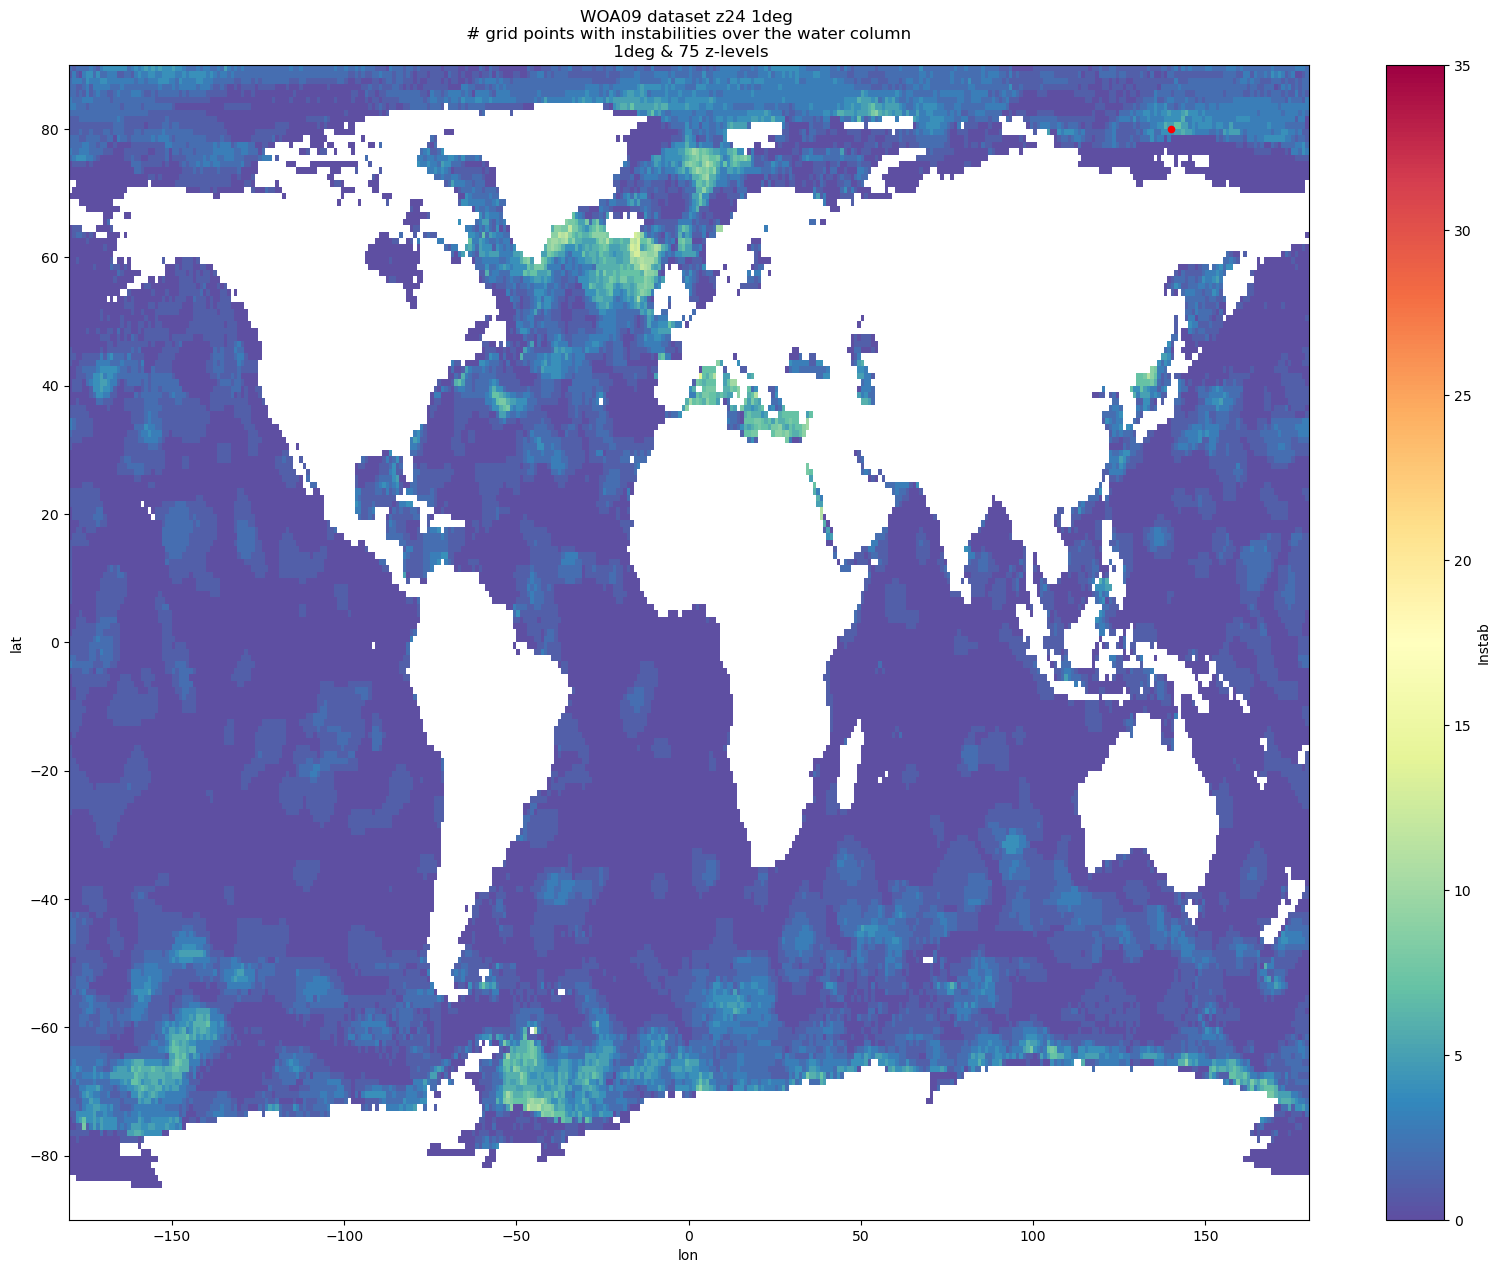

In [189]:
plt.figure(figsize=(20,15))
ds_woa09['Instab'].plot(cmap='Spectral_r',vmax=35)
# Latitude & longitude
loc_x=140  ;  loc_y=80
plt.scatter(loc_x,loc_y,20,marker='o', color='r')
plt.title( 'WOA09 dataset z24 1deg \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

Text(0.5, 1.0, 'WOA09 dataset BEFORE stabilisation with GSW \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

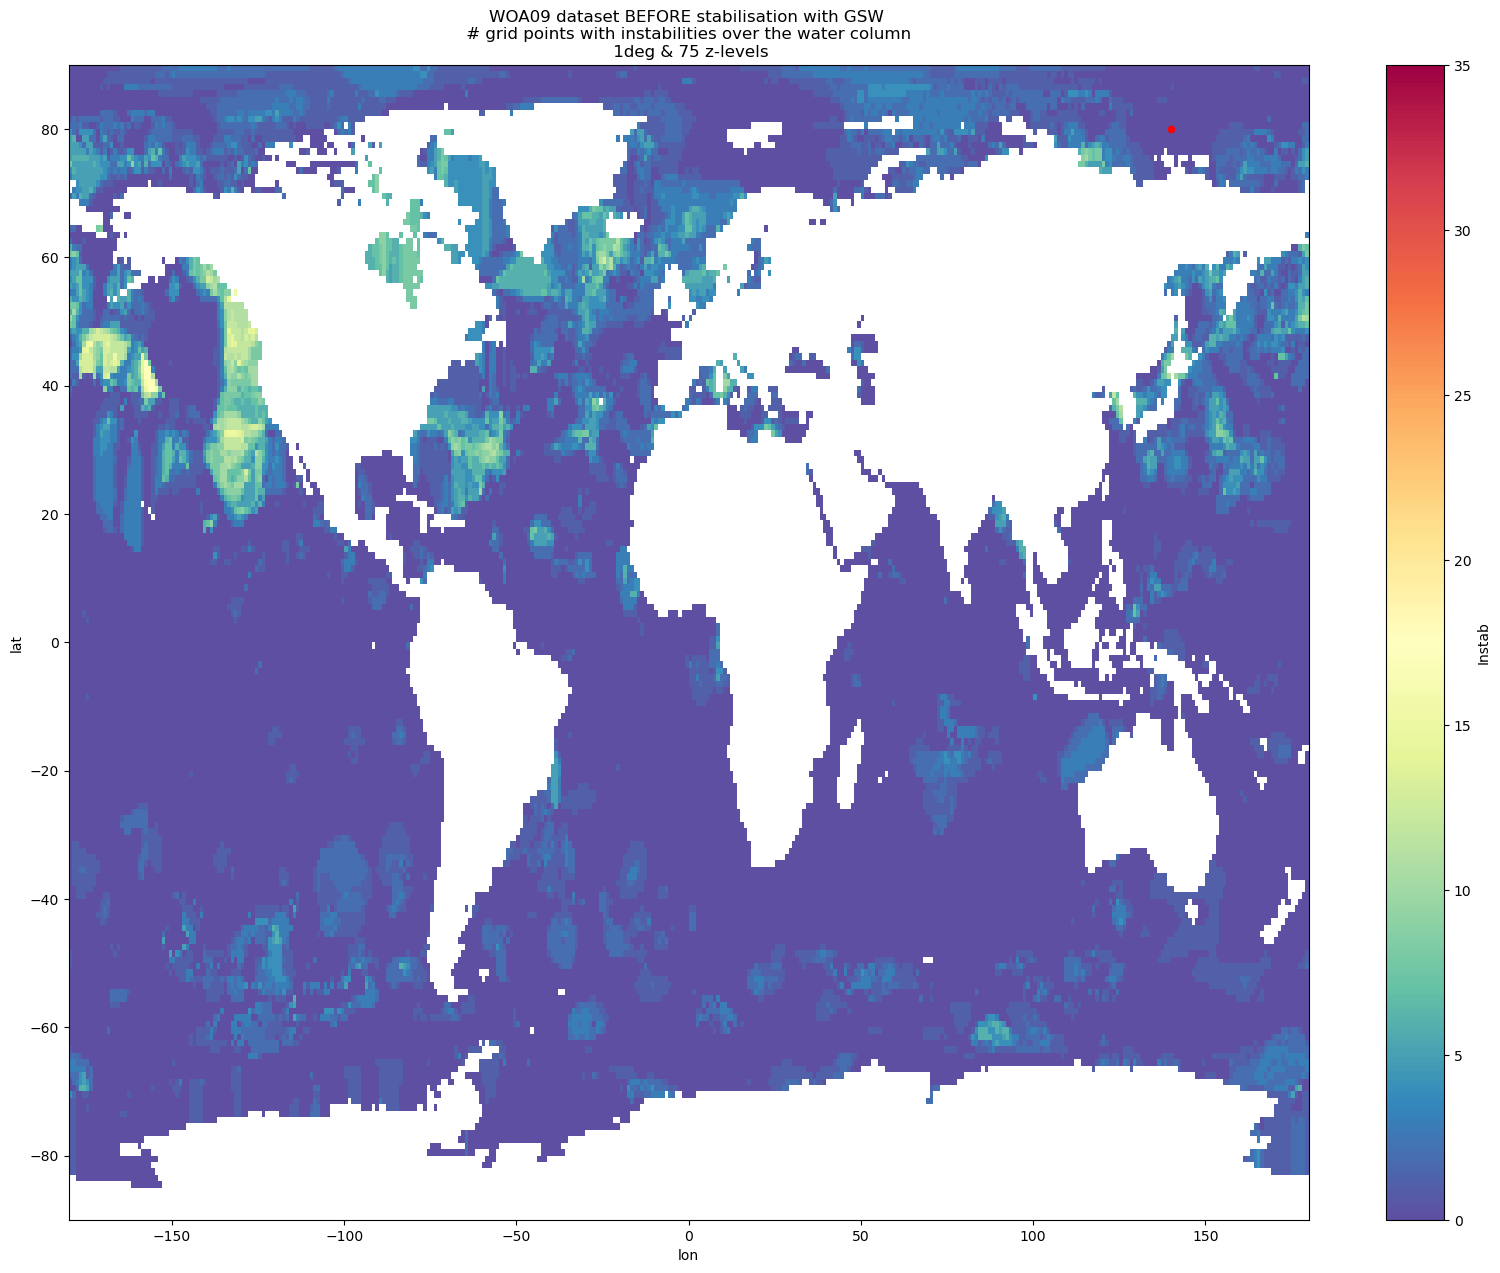

In [218]:
plt.figure(figsize=(20,15))
ds_woa09_ori['Instab'].plot(cmap='Spectral_r',vmax=35)
# Latitude & longitude
loc_x=140  ;  loc_y=80

plt.scatter(loc_x,loc_y,20,marker='o', color='r')
plt.title( 'WOA09 dataset BEFORE stabilisation with GSW \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

Text(0.5, 1.0, 'WOA09 dataset AFTER stabilisation with GSW \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

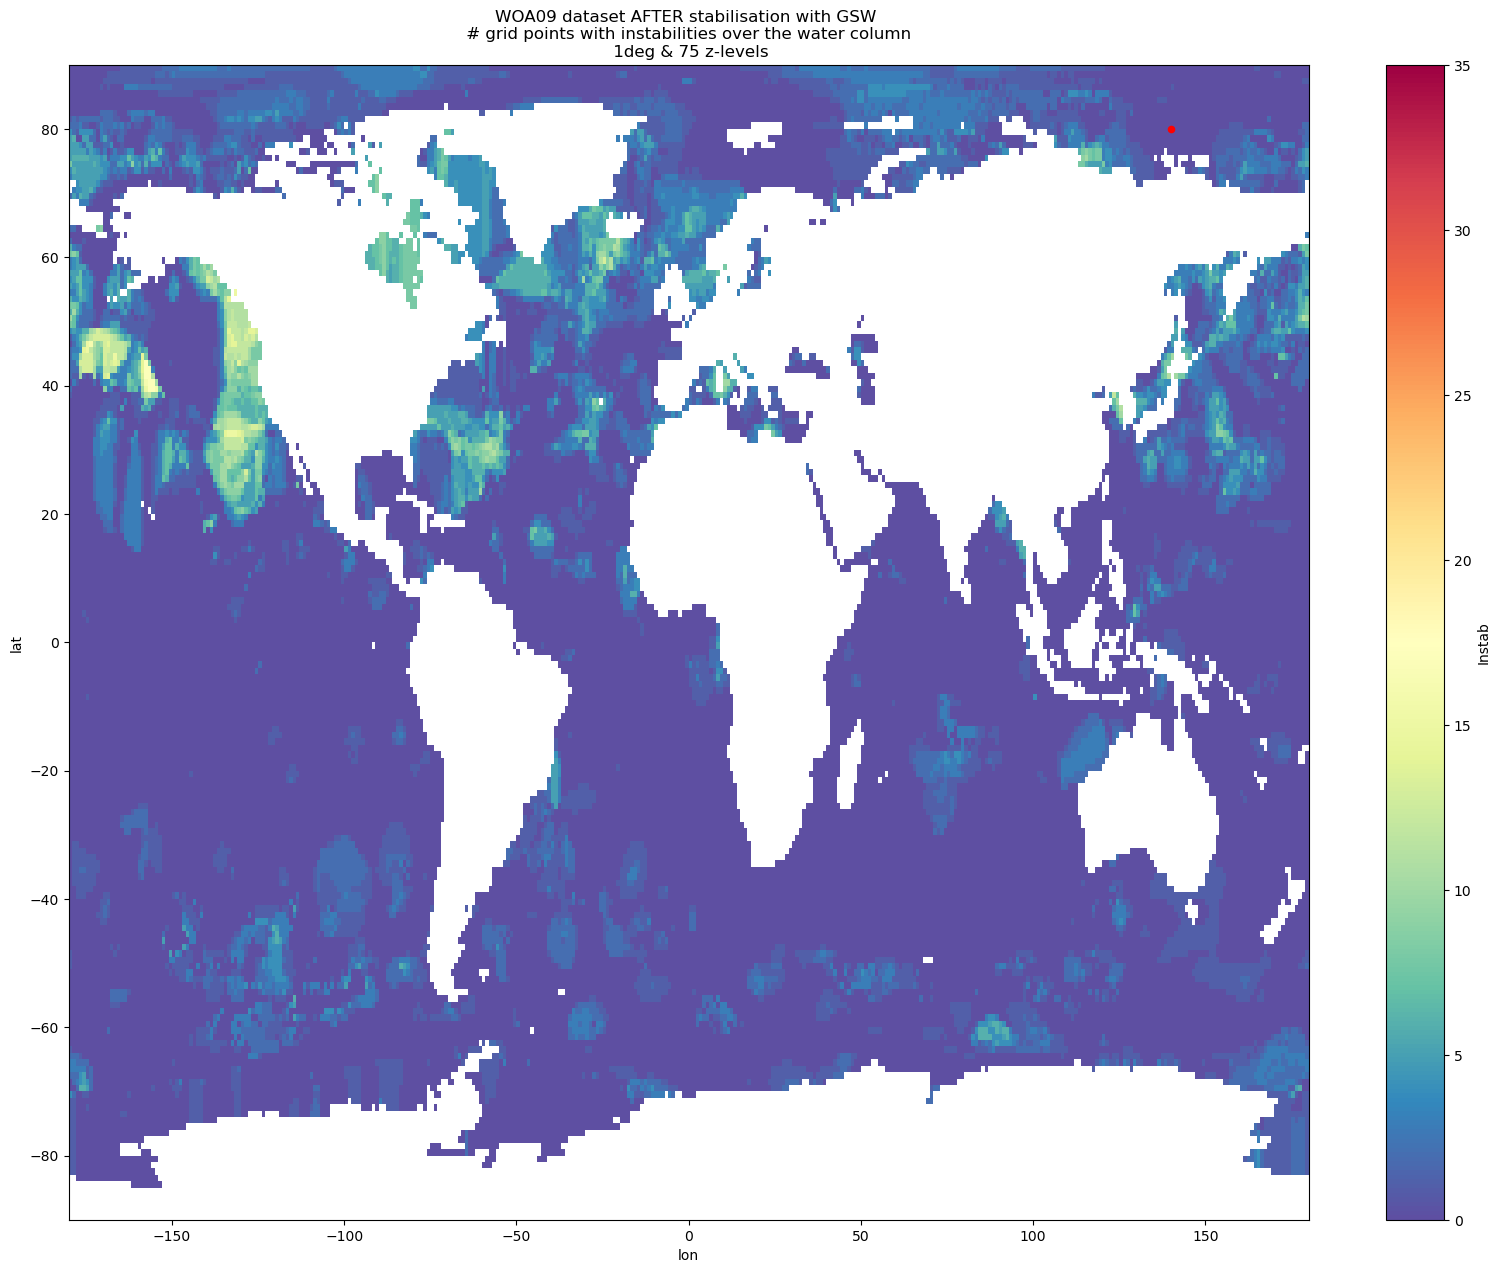

In [213]:
plt.figure(figsize=(20,15))
ds_IN['Instab'].plot(cmap='Spectral_r',vmax=35)
# Latitude & longitude
loc_x=140  ;  loc_y=80
plt.scatter(loc_x,loc_y,20,marker='o', color='r')
plt.title( 'WOA09 dataset AFTER stabilisation with GSW \n # grid points with instabilities over the water column \n 1deg & 75 z-levels')

/tmp/ipykernel_4964/2790957951.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')


Text(0.5, 1.0, 'WOA09 dataset z24 1deg \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

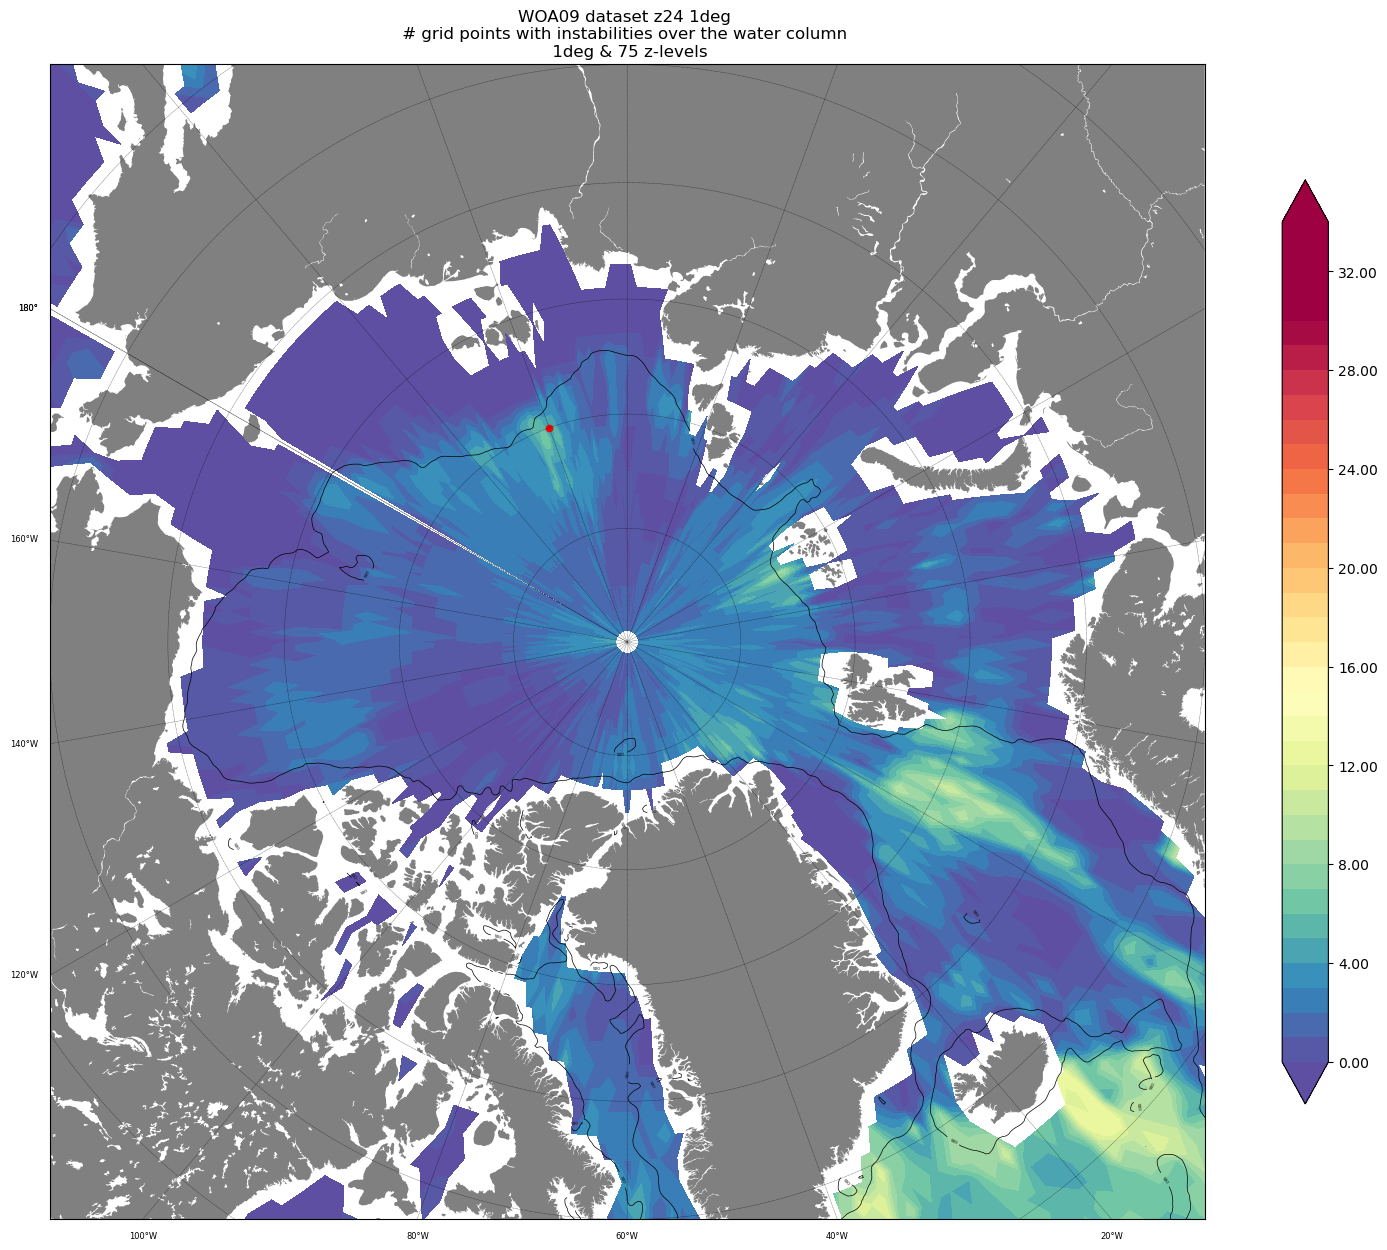

In [202]:
plt.figure(figsize=(20,15))
Arc_Bat(ztype='isol500')
m=Arc_plot(wlon2D,wlat2D,ds_woa09['Instab'],np.arange(0,35),[0.,30.],zmy_cmap='Spectral_r')
x,y = m(loc_x,loc_y)
m.scatter(x,y,20,marker='o', color='r')
plt.title( 'WOA09 dataset z24 1deg \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

/tmp/ipykernel_4964/2790957951.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')


Text(0.5, 1.0, 'WOA09 dataset BEFORE stabilisation with GSW \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

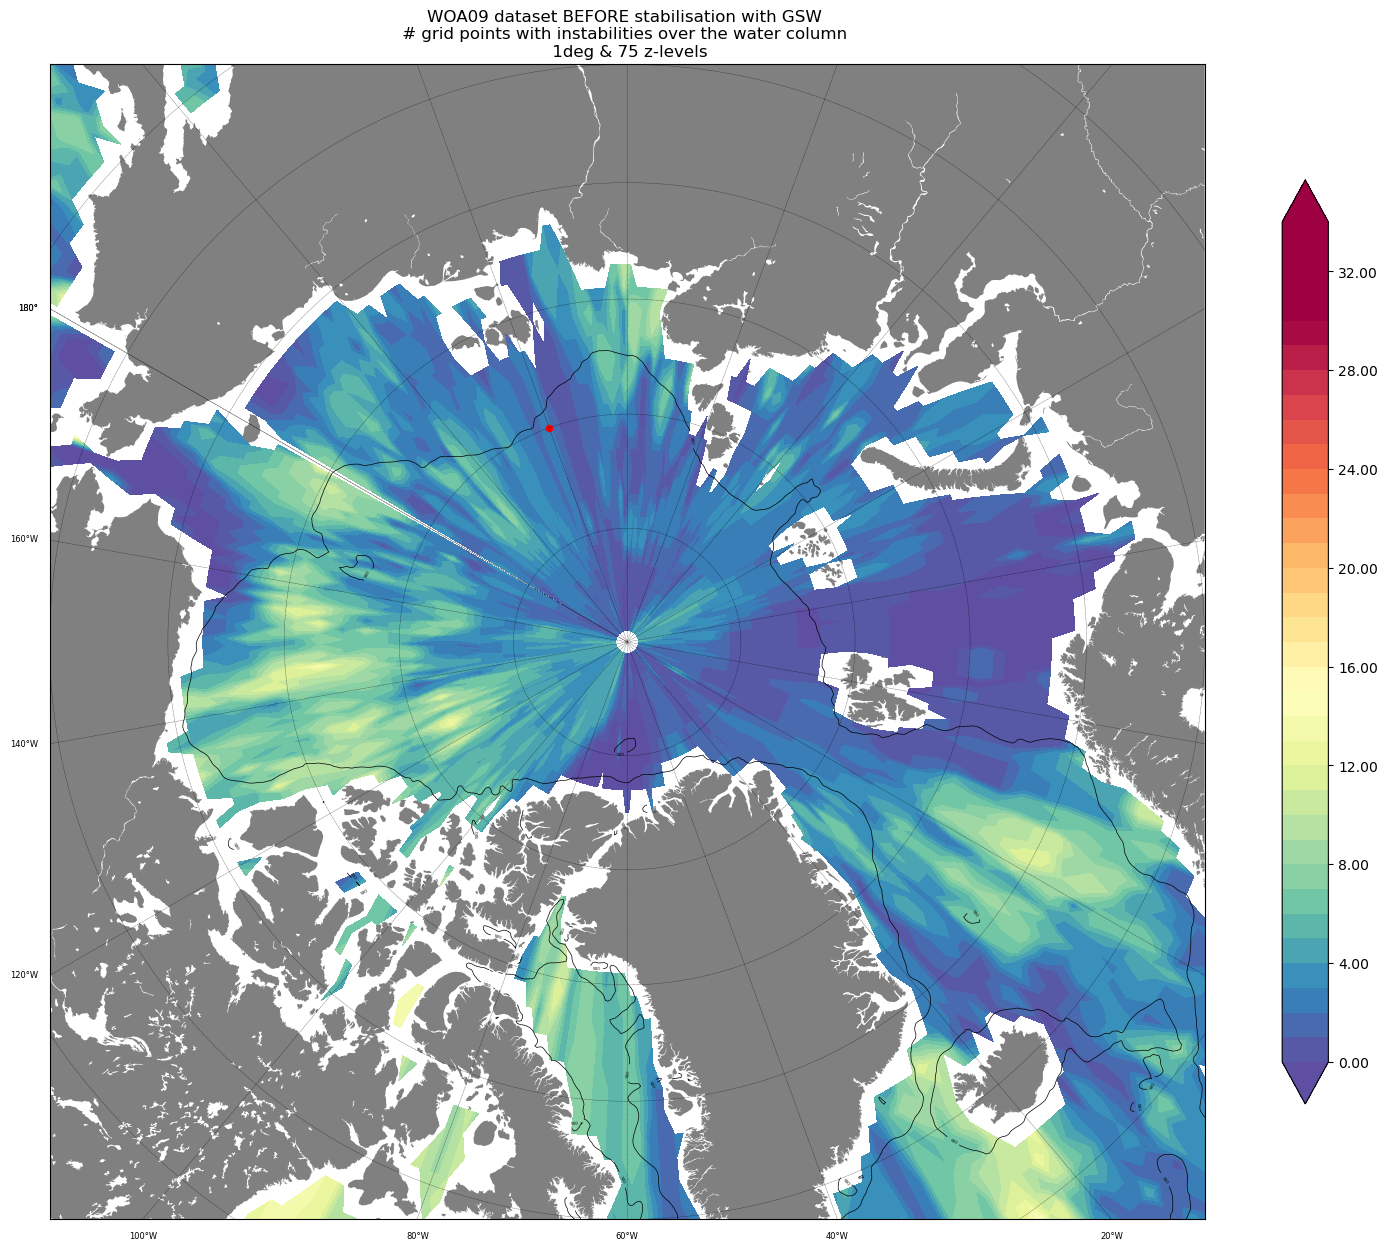

In [200]:
plt.figure(figsize=(20,15))
Arc_Bat(ztype='isol500')
m=Arc_plot(ds_latlonZ['lon'],ds_latlonZ['lat'],ds_woa09_ori['Instab'],np.arange(0,35),[0.,30.],zmy_cmap='Spectral_r')
x,y = m(loc_x,loc_y)
m.scatter(x,y,20,marker='o', color='r')
plt.title( 'WOA09 dataset BEFORE stabilisation with GSW \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

/tmp/ipykernel_4964/2790957951.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pal = plt.cm.get_cmap('binary')


Text(0.5, 1.0, 'WOA09 dataset AFTER stabilisation with GSW \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

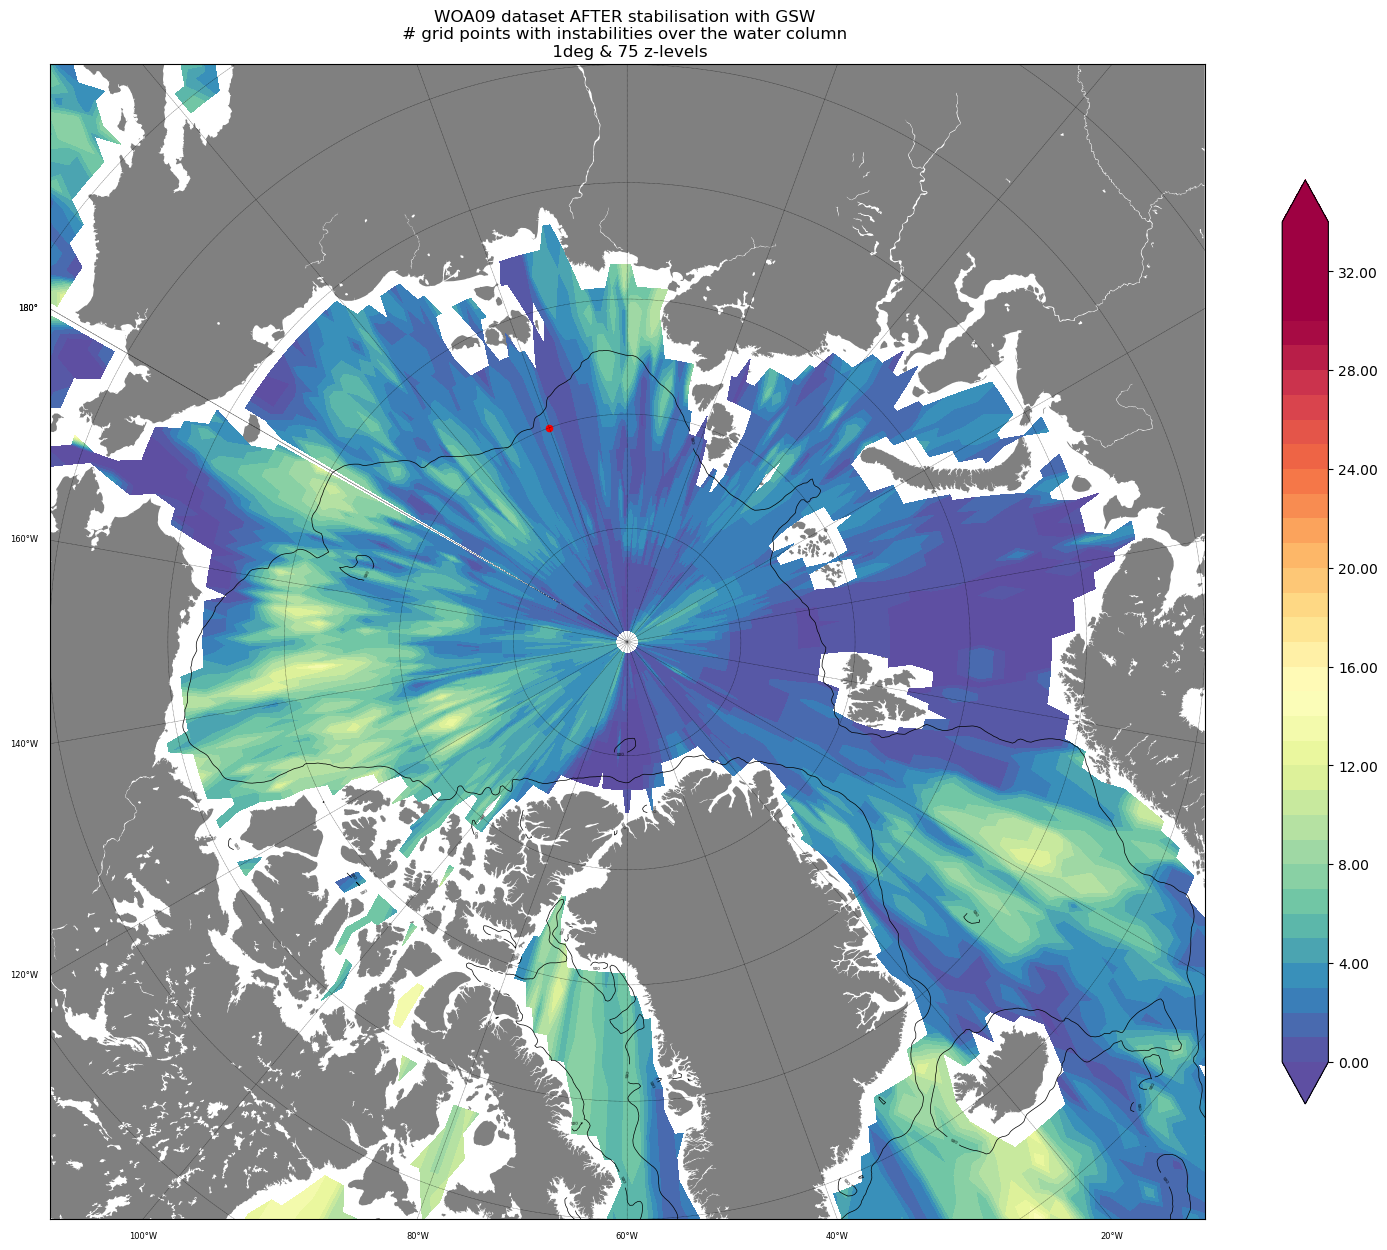

In [199]:
plt.figure(figsize=(20,15))
Arc_Bat(ztype='isol500')
m=Arc_plot(ds_latlonZ['lon'],ds_latlonZ['lat'],ds_IN['Instab'],np.arange(0,35),[0.,30.],zmy_cmap='Spectral_r')
x,y = m(loc_x,loc_y)
m.scatter(x,y,20,marker='o', color='r')
plt.title( 'WOA09 dataset AFTER stabilisation with GSW \n # grid points with instabilities over the water column  \n 1deg & 75 z-levels')

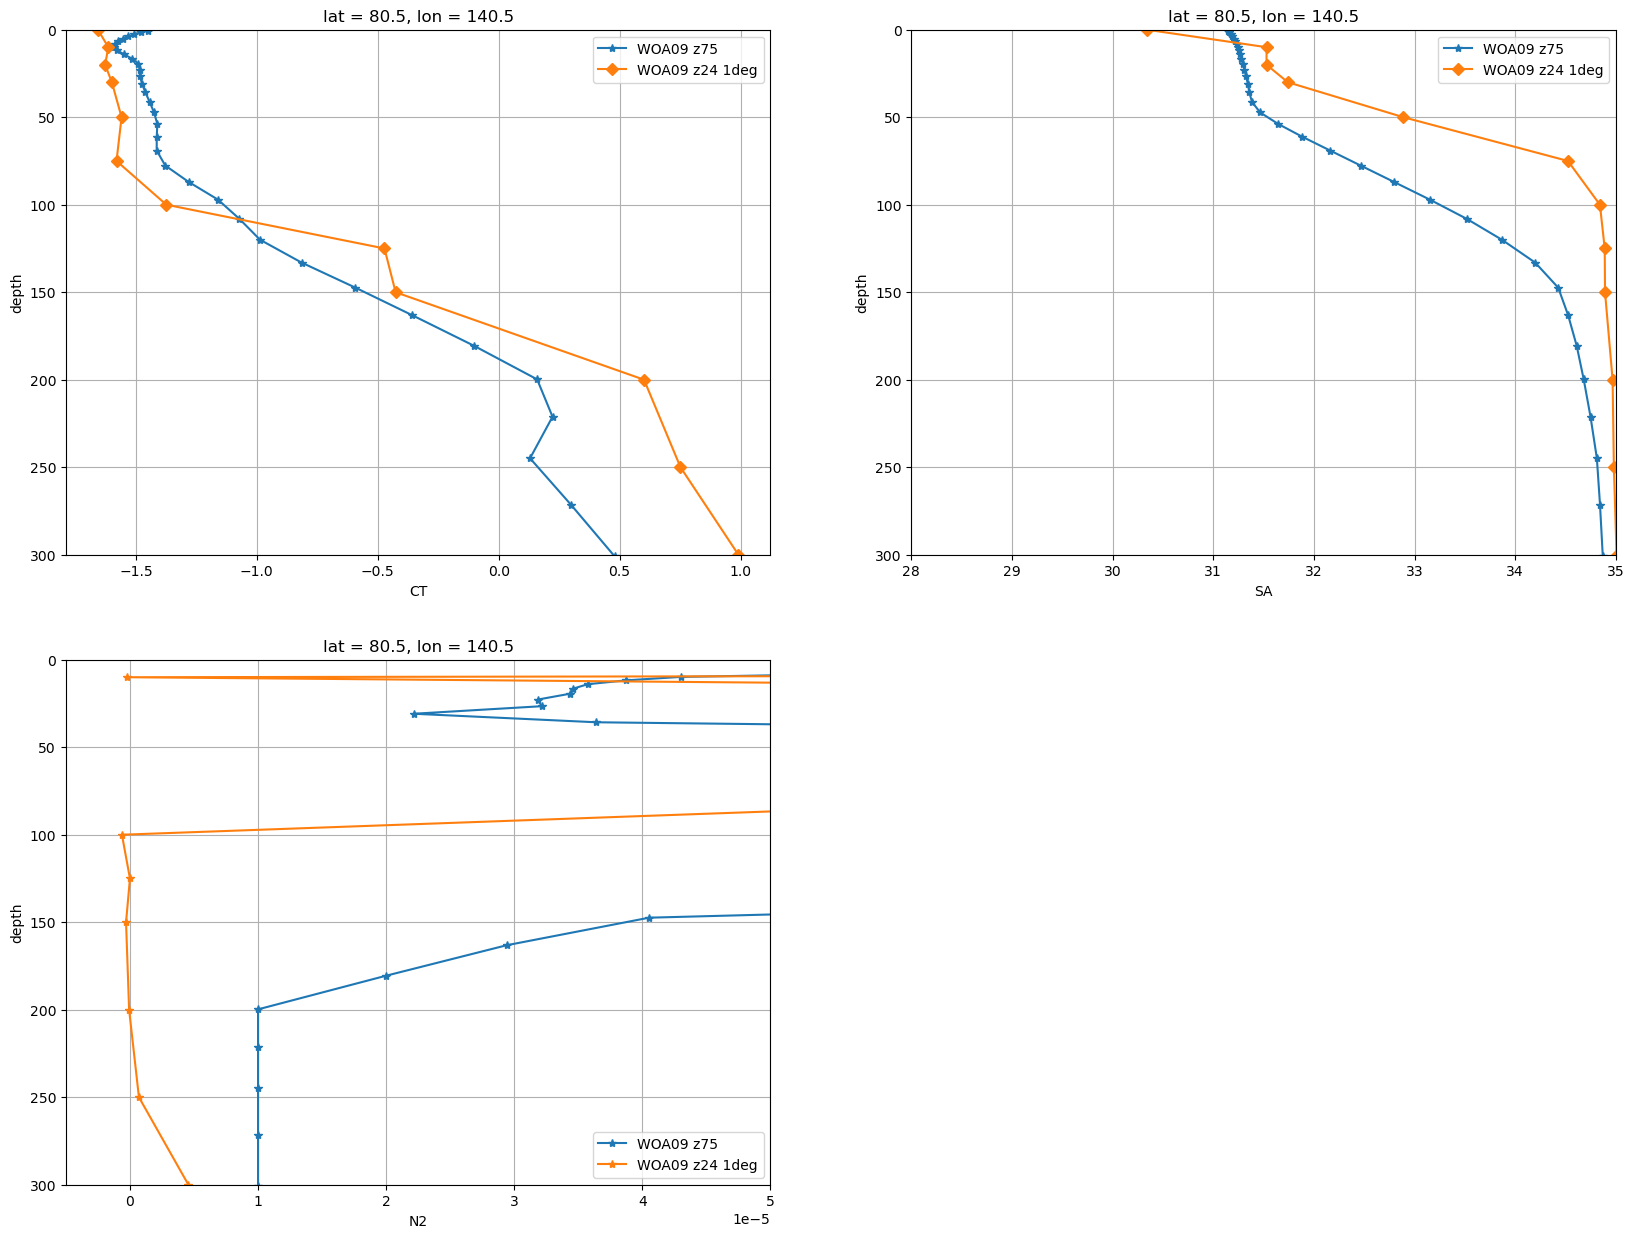

In [227]:
plt.figure(figsize=(20,15))

# Latitude & longitude
loc_x=140.  ;  loc_y=80.   ;  zdep=300.

plt.subplot(221)
ds_woa09_ori['CT'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*',label='WOA09 z75')
#ds_woa09_ori['t_an'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*',label='WOA09 Tpot z75')
#ds_IN['CT'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='o',label='WOA09 z75 stab')
ds_woa09['CT'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='D',label='WOA09 z24 1deg')
#ds_woa09['t_an'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='d',label='WOA09 Tpot z24 1deg')
plt.legend()
plt.ylim([zdep,0.])
plt.grid(True)

plt.subplot(222)
ds_woa09_ori['SA'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*',label='WOA09 z75')
#ds_woa09_ori['s_an'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot.line(y='depth',marker='*',label='WOA09 psu z75')
#ds_IN['SA'].isel(time_counter=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='o',label='WOA09 z75 stab')
ds_woa09['SA'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='D',label='WOA09 z24 1deg')
#ds_woa09['s_an'].isel(time=0).sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='d',label='WOA09 psu z24 1deg')
plt.legend()
plt.xlim([28,35.])
plt.ylim([zdep,0.])
plt.grid(True)

if True:
    plt.subplot(223)
    ds_N2['N2'].sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='*',label='WOA09 z75')
    #ds_N2_ori['N2'].sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='*',label='WOA09 z75 stab')
    ds_WN2['N2'].sel(lat=loc_y,lon=loc_x,method='nearest').plot(y='depth',marker='*',label='WOA09 z24 1deg')
    plt.legend()
    plt.xlim([-0.5e-5,5e-5])
    plt.ylim([zdep,0.])
    plt.grid(True)

In [ ]:
# Read WOA09 original salinity
INDIR='/data0/project/drakkar/REFERENCE_DATA/WOA2009/DATA/1degx1deg/'
ds_woa09I=xr.open_dataset(INDIR+'woa09_salinity_monthly_1deg.nc',\
                          drop_variables=['s_mn','s_dd','s_dd','s_ma','s_sd','s_se','s_oa','s_gp'],\
                          decode_times=False)
ds_woa09I
lsm=np.ones((ds_woa09I.sizes['lat'],ds_woa09I.sizes['lon']))
lsm[np.isnan(ds_woa09I['s_an'].isel(time=0,depth=0))] = 0.

# Output new fields 

In [29]:
if True:
    INDIR="./CREG12.L75-I/"
    ds_out=xr.Dataset()
    # Save WOA09 Practical Salinity 
    ds_out['s_an']=(('time_counter','z','lat0','lon0'),ds_SP.values)
    #ds_out['lat']=(('lat0','lon0'),ds_inS['lat'].values)
    #ds_out['lon']=(('lat0','lon0'),ds_inS['lon'].values)
    ds_out.attrs['History']='This salinity field has been stabilise using GSW gsw_stabilise_SA_const_t function, i.e. without changing the temperature'
    #ds_out.to_netcdf(INDIR+'woa09_salinity_monthly_1deg_s_an_CMA_drowned_Ex_L75_stabilise.nc',unlimited_dims='time_counter')
    ds_out.to_netcdf(INDIR+'stabilise.nc',unlimited_dims='time_counter')